In [1]:
from collections import defaultdict
import scanpy as sc
import scanpy.external as sce
import scipy.io
# import scrublet as scr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import scvelo as scv
#import velocyto as vcy
from os import listdir
from os.path import isfile, join
import glob
from collections import Counter
import loompy as lp
import numba
import llvmlite

# import mnnpy
from matplotlib import colors

In [2]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [3]:
sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.3 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0 statsmodels==0.13.0rc0 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


**Figures**

In [4]:
adata = sc.read_h5ad('./write/all_adata_labeled.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 16228 × 23510
    obs: 'sample', 'batch', 'age', 'day', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mt2', 'n_counts', 'S_score', 'G2M_score', 'phase', 'pred_cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'dendrogram_pred_cell_type', 'hvg', 'pca', 'pred_cell_type_colors', 'sample_colors', 't-test_overestim_var_pred', 'wilcoxon_pred'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'

In [6]:
sce.pp.bbknn(adata,
             use_rep ='X_pca_harmony'
            )

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


In [7]:
adata

AnnData object with n_obs × n_vars = 16228 × 23510
    obs: 'sample', 'batch', 'age', 'day', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mt2', 'n_counts', 'S_score', 'G2M_score', 'phase', 'pred_cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'dendrogram_pred_cell_type', 'hvg', 'pca', 'pred_cell_type_colors', 'sample_colors', 't-test_overestim_var_pred', 'wilcoxon_pred', 'neighbors'
    obsm: 'X_pca', 'X_pca_harmony'
    varm:

In [8]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


In [9]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test_overestim_var', key_added='t-test_overestim_var')

ranking genes
    finished: added to `.uns['t-test_overestim_var']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


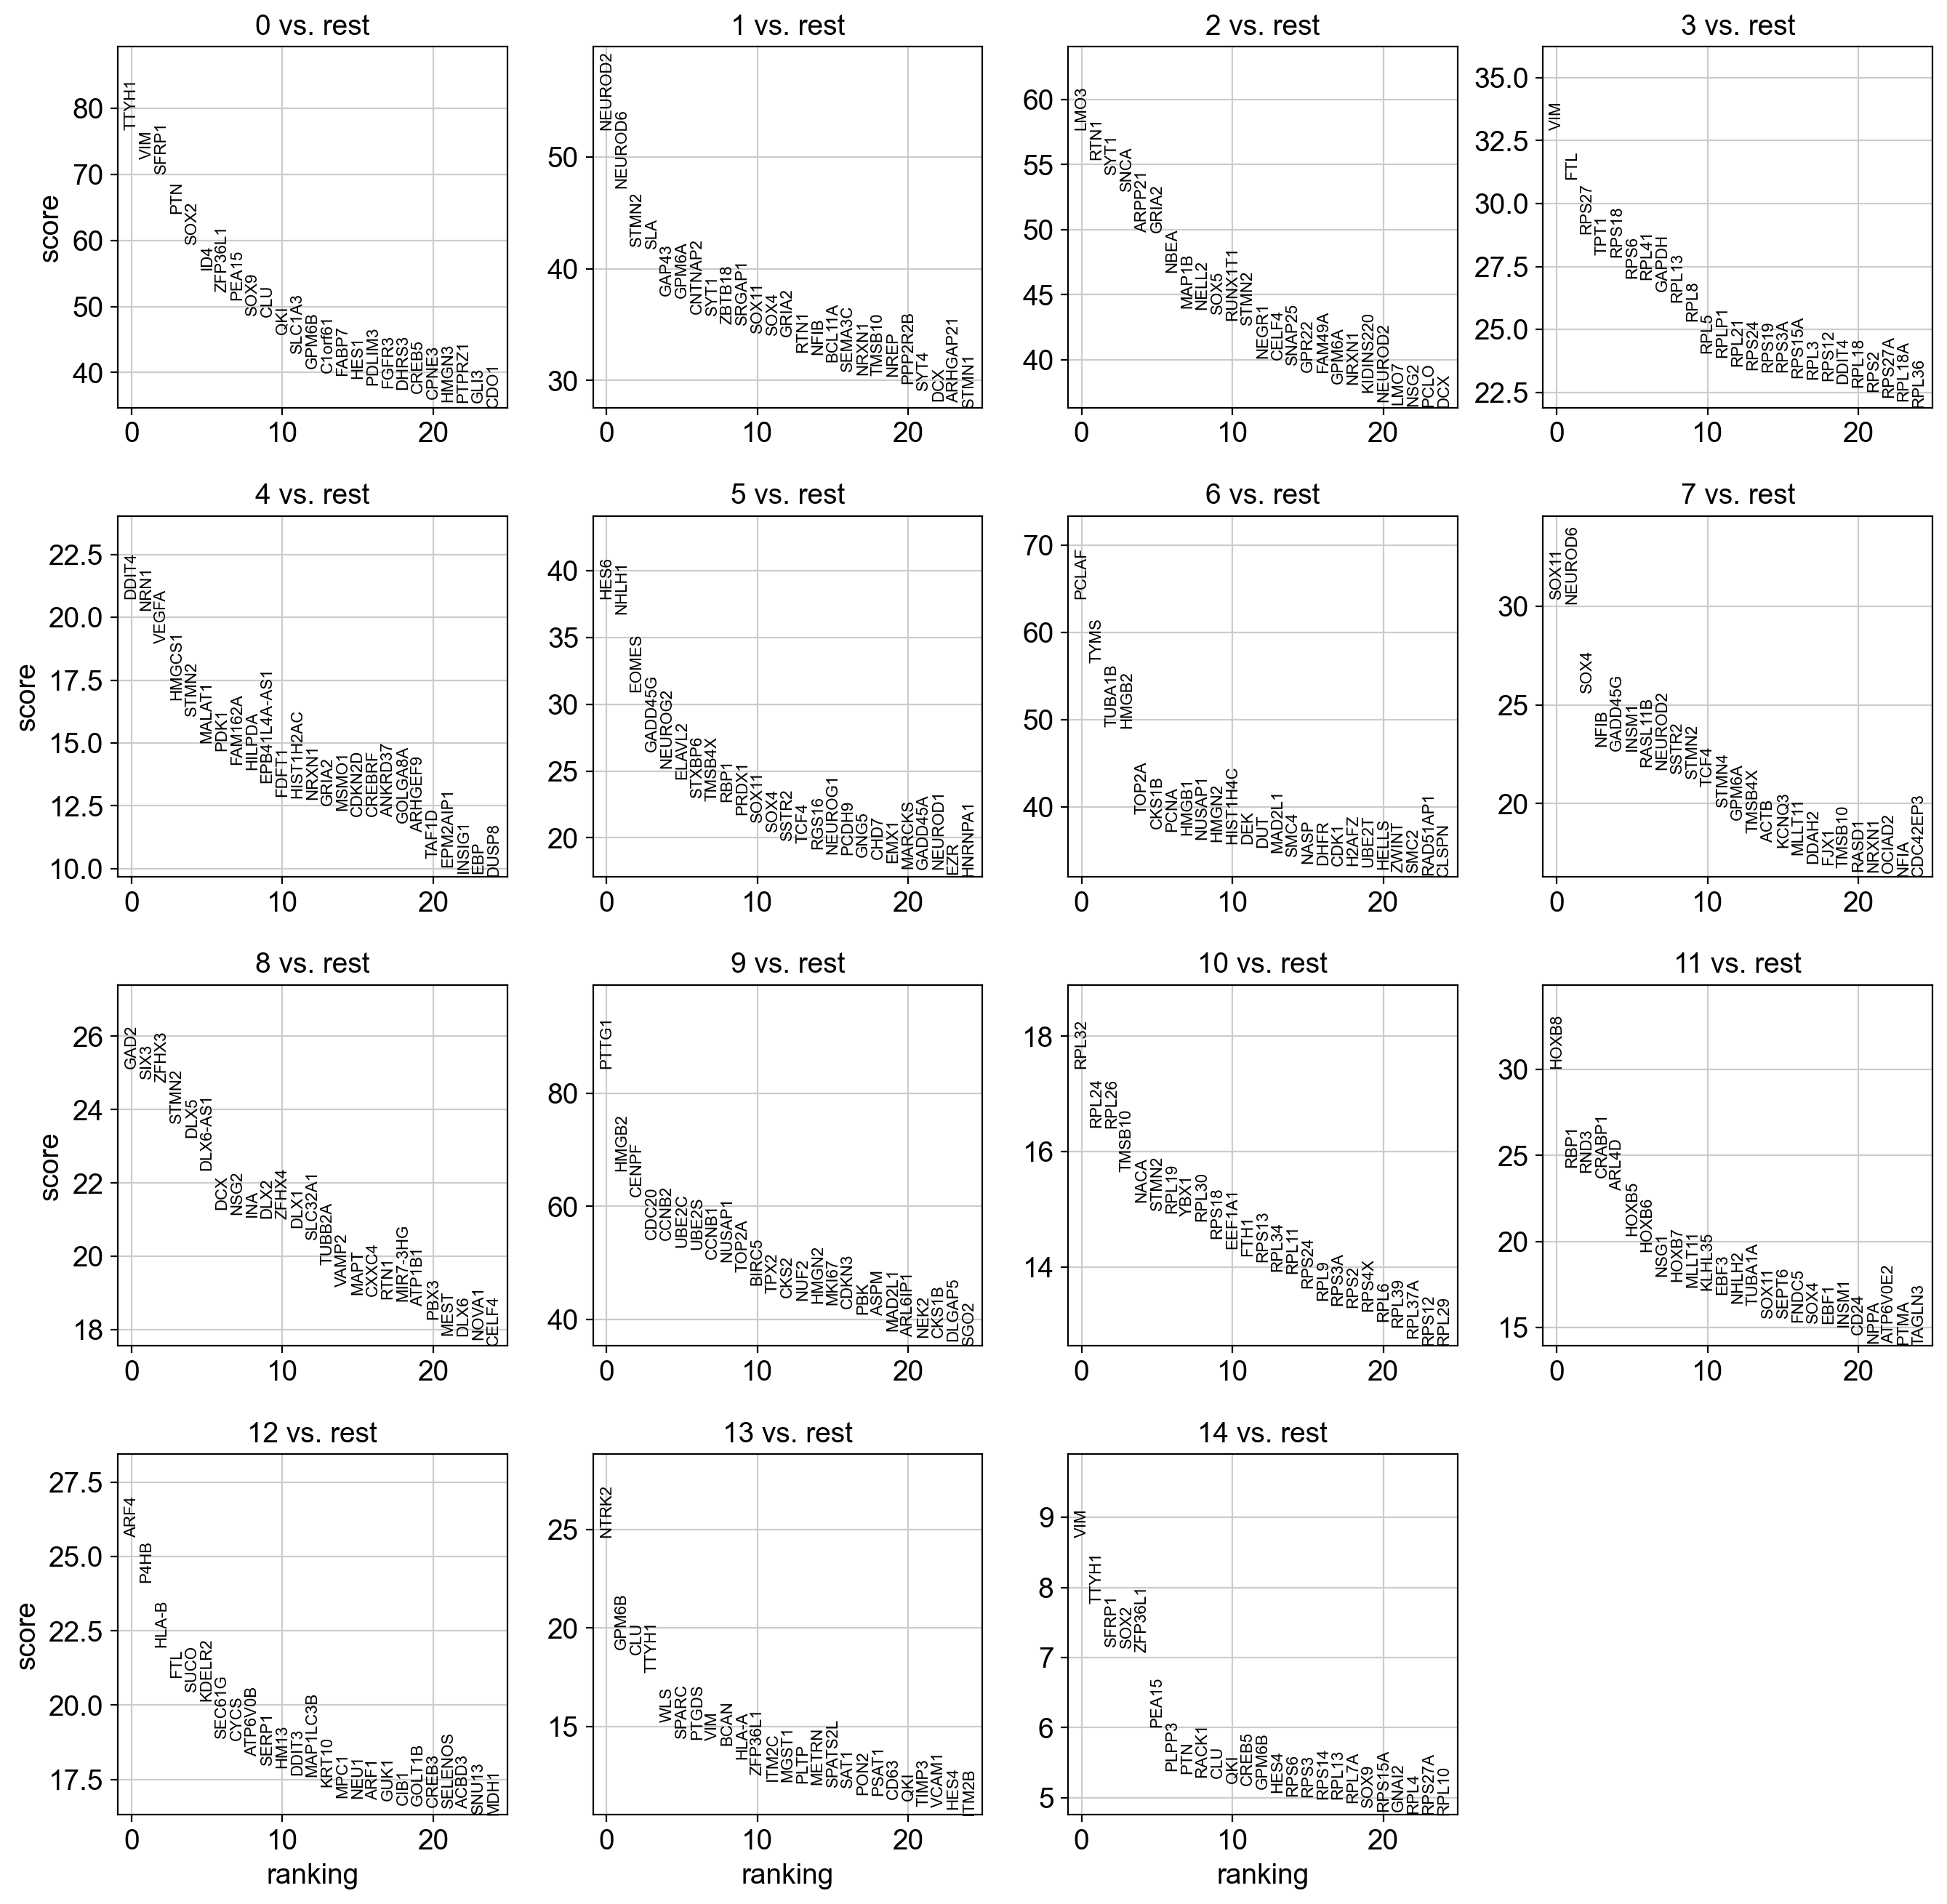

In [10]:
sc.settings.set_figure_params(dpi=100)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='t-test_overestim_var')
sc.settings.set_figure_params(dpi=80)

In [11]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:06:40)


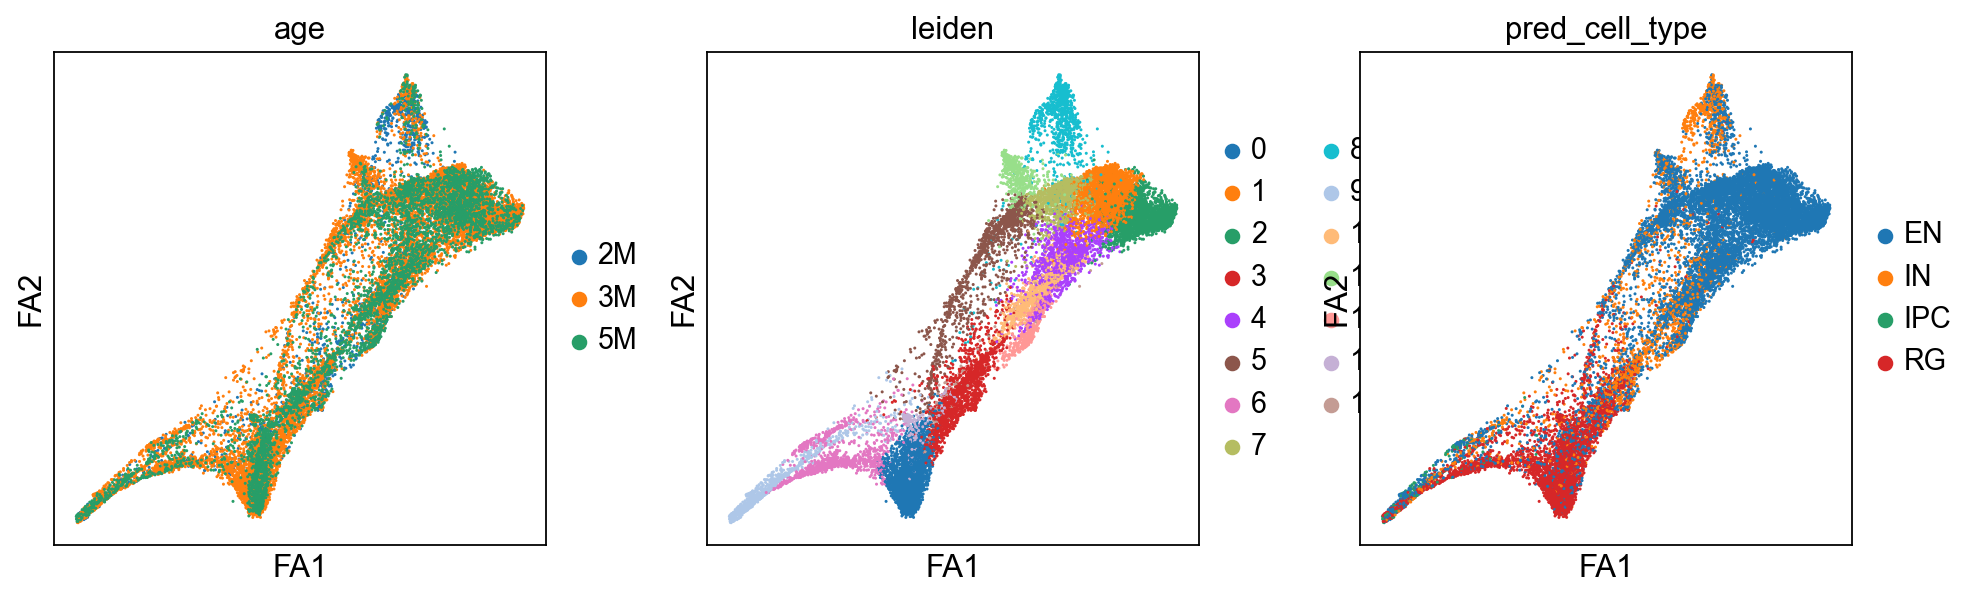

In [12]:
sc.pl.draw_graph(adata, color=["age","leiden","pred_cell_type"])

In [13]:
subadata = adata[~adata.obs['leiden'].str.contains(('10'))]

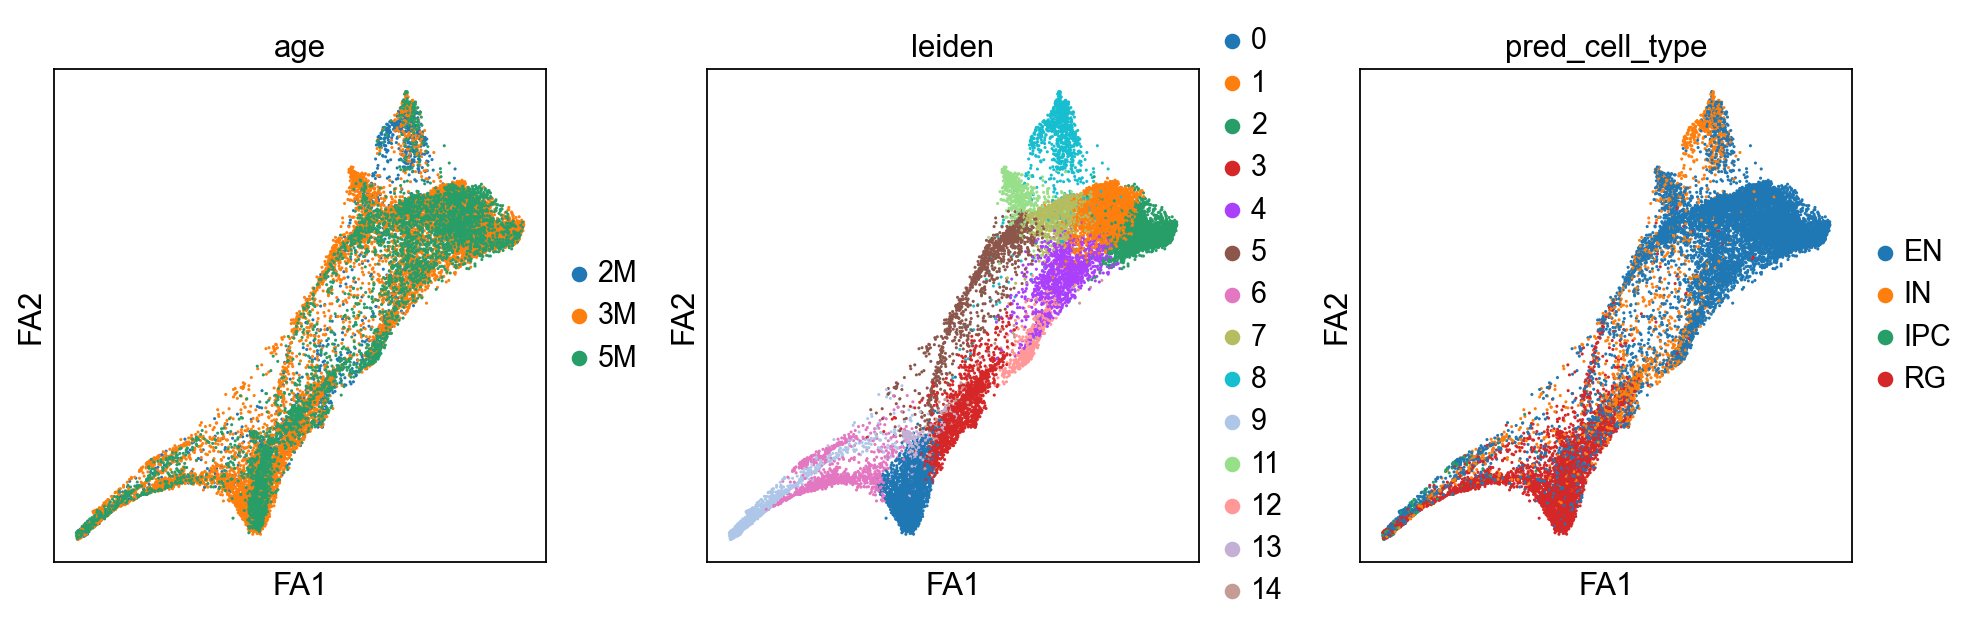

In [15]:
sc.pl.draw_graph(subadata, color=["age","leiden","pred_cell_type"])

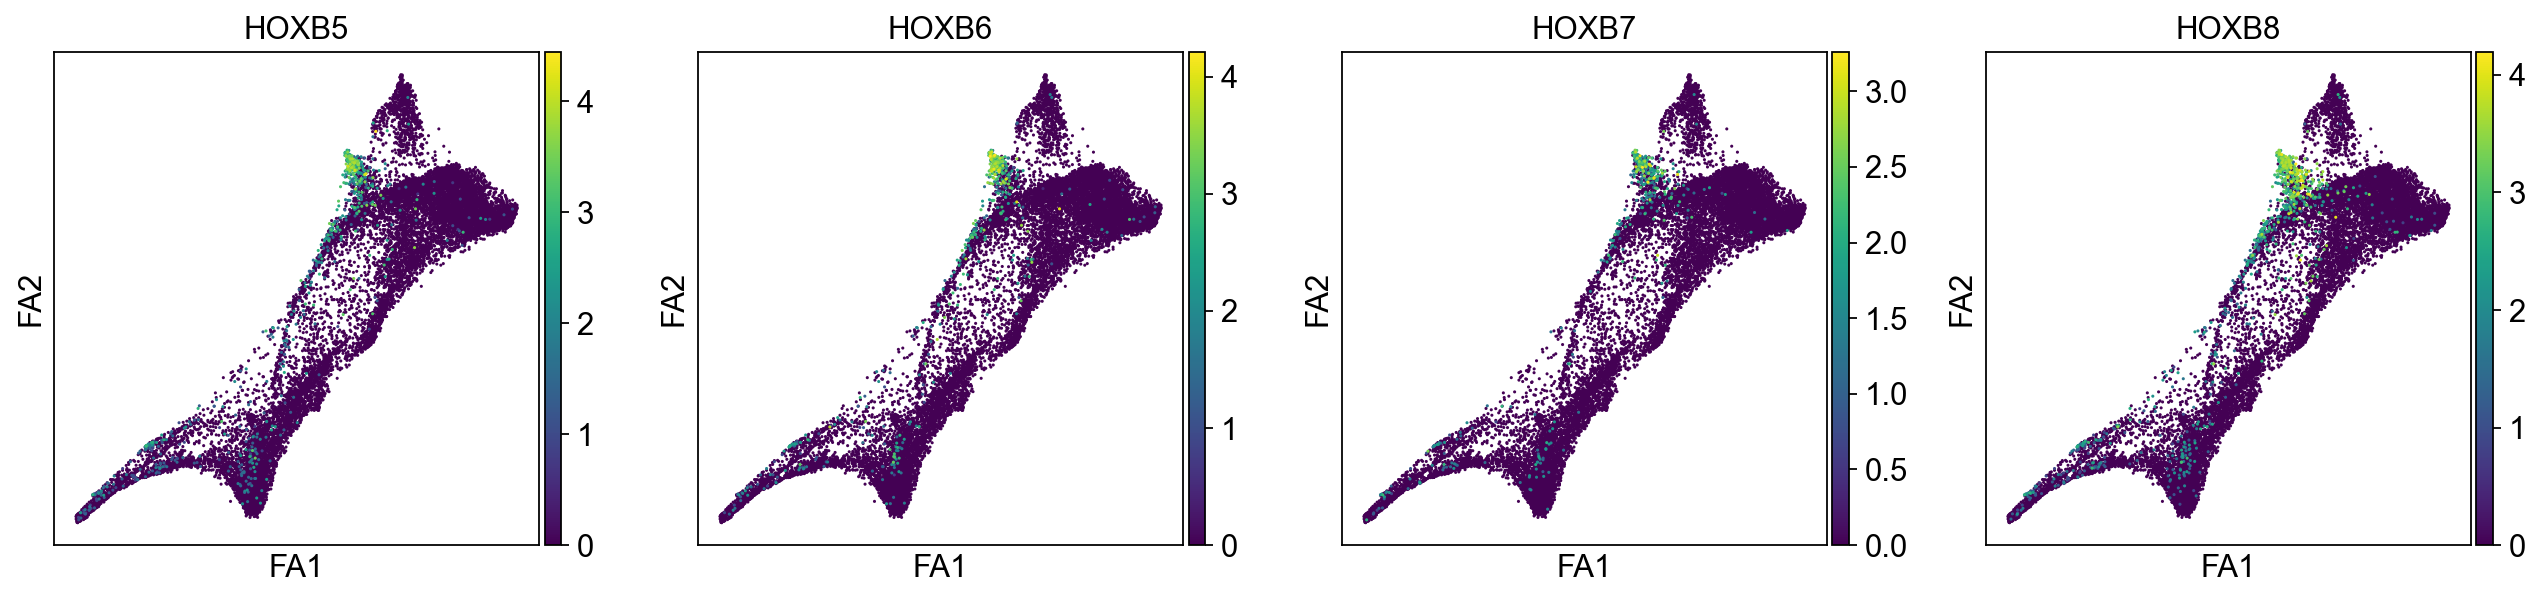

In [16]:
sc.pl.draw_graph(subadata, color=['HOXB5','HOXB6', 'HOXB7', 'HOXB8'
                                  ])

In [17]:
subadata

View of AnnData object with n_obs × n_vars = 15481 × 23510
    obs: 'sample', 'batch', 'age', 'day', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mt2', 'n_counts', 'S_score', 'G2M_score', 'phase', 'pred_cell_type', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'age_colors', 'dendrogram_pred_cell_type', 'hvg', 'pca', 'pred_cell_type_colors', 'sample_colors', 't-test_overestim_var_pred', 'wilcoxon_pred', 'neighbors', 'leiden', 't-test_overest

In [19]:
subadata.write_h5ad('./write/all_adata_labeled_bbknn.h5ad')